In [ ]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# Load GeoJSON and create graph
def geojson_to_graph(geojson_path):
    with open(geojson_path, 'r') as f:
        data = json.load(f)

    G = nx.Graph()
    node_map = {}
    node_id = 1

    for feature in data["features"]:
        coordinates = feature["geometry"]["coordinates"]
        local_nodes = []

        for lon, lat in coordinates:
            if (lat, lon) not in node_map:
                node_map[(lat, lon)] = node_id
                G.add_node(node_id, pos=(lon, lat))
                node_id += 1

            local_nodes.append(node_map[(lat, lon)])

        for i in range(len(local_nodes) - 1):
            G.add_edge(local_nodes[i], local_nodes[i + 1])

    return G

# Compute centrality measures and plot top 100 nodes
def plot_graph(G):
    betweenness = nx.betweenness_centrality(G)
    closeness = nx.closeness_centrality(G)
    centrality_scores = {node: (betweenness[node] + closeness[node]) / 2 for node in G.nodes}
    top_nodes = sorted(centrality_scores, key=centrality_scores.get, reverse=True)[:100]

    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=False, node_size=10, edge_color='gray')
    nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='red', node_size=50)
    plt.show()

# Example usage
graph = geojson_to_graph("filtered_output_2_small.geojson")
plot_graph(graph)


Number of communities detected: 141


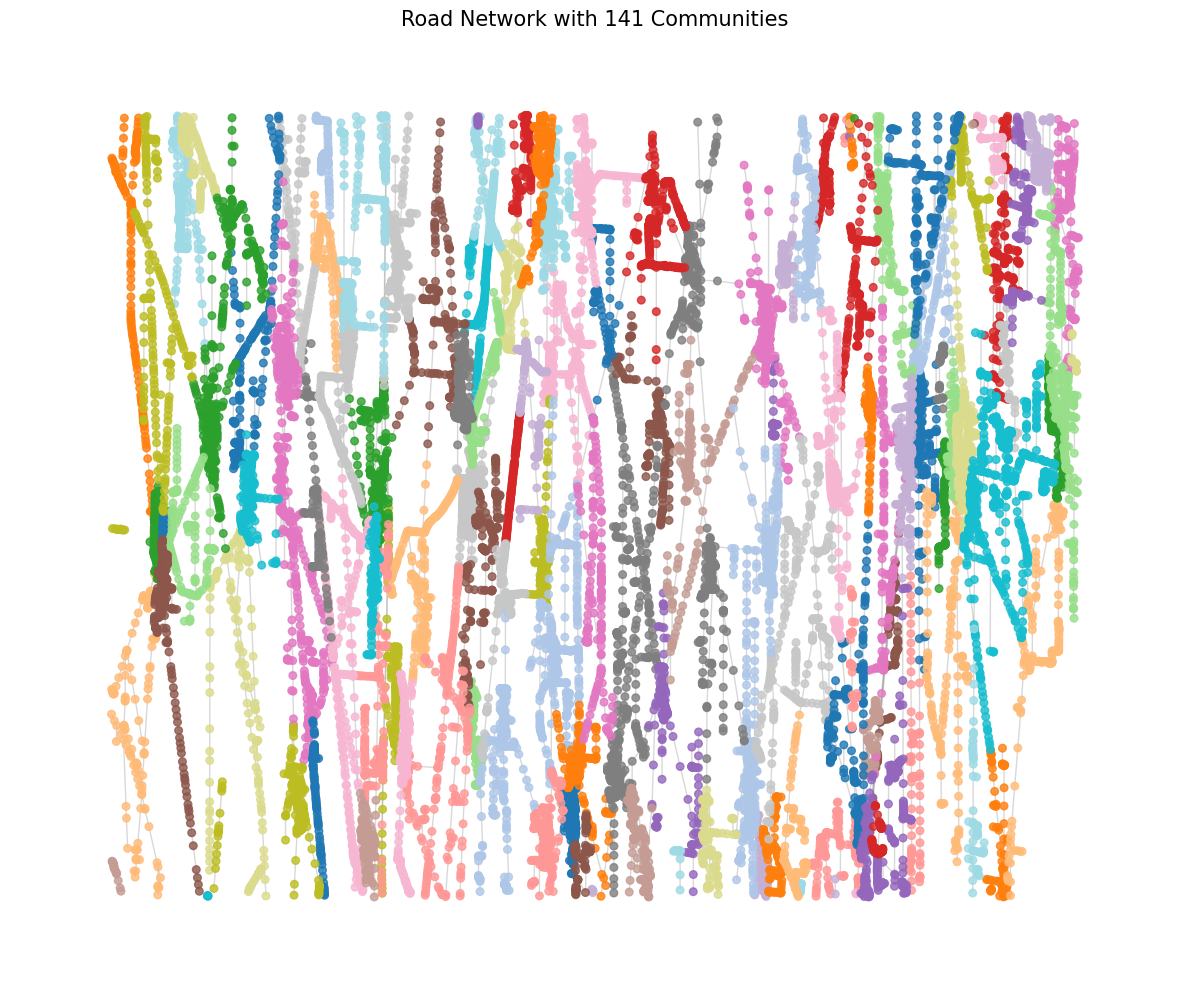

In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load GeoJSON and create graph
def geojson_to_graph(geojson_path):
    with open(geojson_path, 'r') as f:
        data = json.load(f)

    G = nx.Graph()
    node_map = {}
    node_id = 1

    for feature in data["features"]:
        coordinates = feature["geometry"]["coordinates"]
        local_nodes = []

        for lon, lat in coordinates:
            if (lat, lon) not in node_map:
                node_map[(lat, lon)] = node_id
                G.add_node(node_id, pos=(lon, lat))
                node_id += 1
            local_nodes.append(node_map[(lat, lon)])

        for i in range(len(local_nodes) - 1):
            G.add_edge(local_nodes[i], local_nodes[i + 1])

    return G

# Detect communities and plot
def plot_graph_communities(G):
    # Detect communities using Louvain method
    communities = nx.community.louvain_communities(G)
    print(f"Number of communities detected: {len(communities)}")

    # Create a mapping of nodes to their community
    community_map = {}
    for i, community in enumerate(communities):
        for node in community:
            community_map[node] = i

    # Get positions of nodes
    pos = nx.get_node_attributes(G, 'pos')

    # Create colormap
    colors = list(mcolors.TABLEAU_COLORS.values())
    if len(communities) > len(colors):
        colors = plt.cm.tab20.colors

    # Plot the graph
    plt.figure(figsize=(12, 10))

    # Plot edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

    # Plot nodes colored by community
    for i, community in enumerate(communities):
        color = colors[i % len(colors)]
        nx.draw_networkx_nodes(G, pos,
                              nodelist=list(community),
                              node_color=[color] * len(community),
                              node_size=30,
                              alpha=0.8)

    plt.title(f"Road Network with {len(communities)} Communities", fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
graph = geojson_to_graph("filtered_output_2_small.geojson")
plot_graph_communities(graph)

Number of communities: 7
  Community 0: 4375 nodes
  Community 1: 3913 nodes
  Community 2: 3711 nodes
  Community 3: 2769 nodes
  Community 4: 3349 nodes
  Community 5: 2800 nodes
  Community 6: 4096 nodes


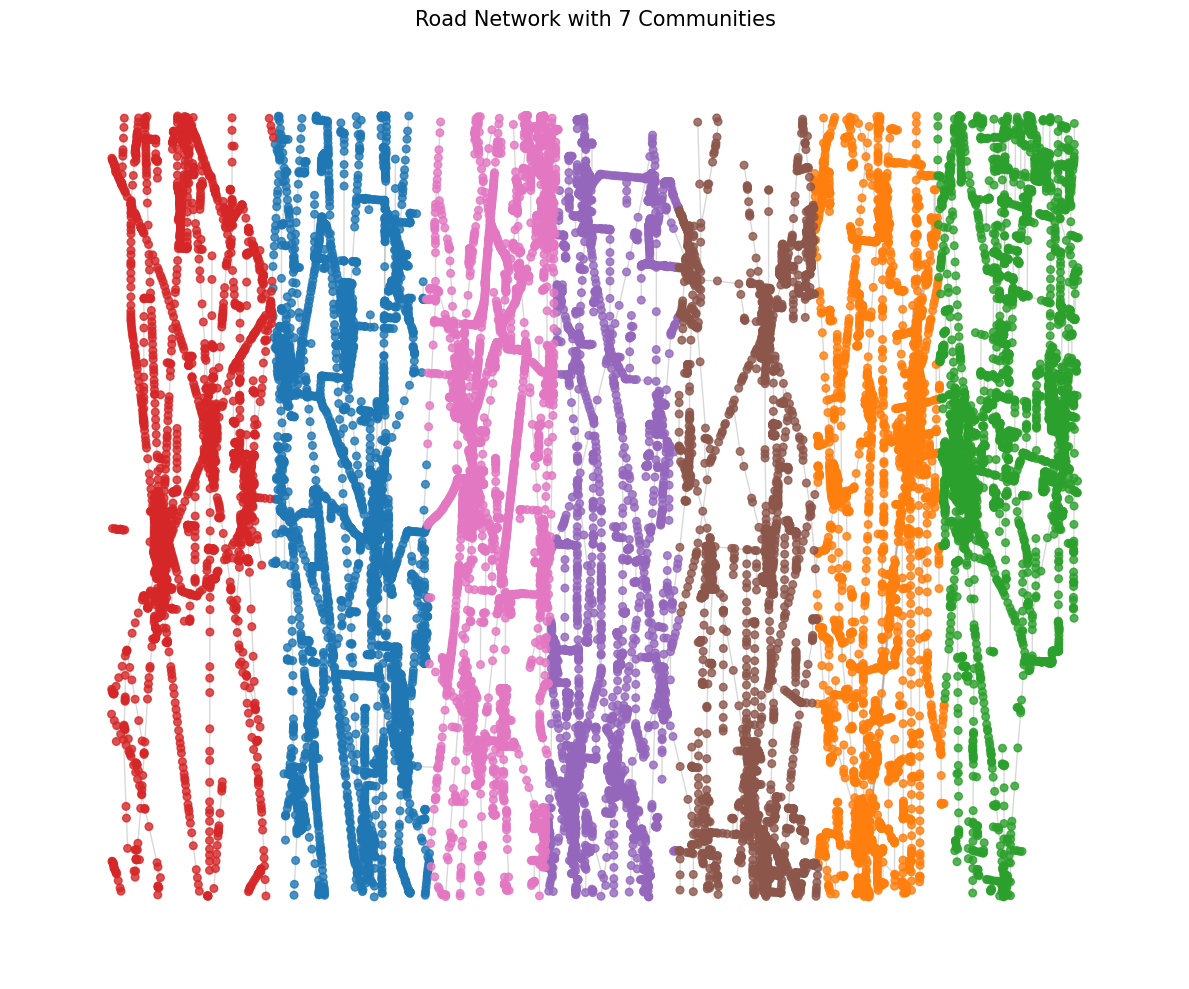

In [3]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.cluster import KMeans

# Load GeoJSON and create graph
def geojson_to_graph(geojson_path):
    with open(geojson_path, 'r') as f:
        data = json.load(f)

    G = nx.Graph()
    node_map = {}
    node_id = 1

    for feature in data["features"]:
        coordinates = feature["geometry"]["coordinates"]
        local_nodes = []

        for lon, lat in coordinates:
            if (lat, lon) not in node_map:
                node_map[(lat, lon)] = node_id
                G.add_node(node_id, pos=(lon, lat))
                node_id += 1
            local_nodes.append(node_map[(lat, lon)])

        for i in range(len(local_nodes) - 1):
            G.add_edge(local_nodes[i], local_nodes[i + 1])

    return G

# Detect communities using K-Means and plot
def plot_graph_communities(G, num_communities=5):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # Create a matrix of node positions for K-Means
    positions = np.array([pos[node] for node in G.nodes()])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_communities, random_state=42)
    clusters = kmeans.fit_predict(positions)

    # Create a mapping of nodes to their community
    community_map = {}
    for i, node in enumerate(G.nodes()):
        community_map[node] = clusters[i]

    # Create communities list for plotting
    communities = [[] for _ in range(num_communities)]
    for node, community_id in community_map.items():
        communities[community_id].append(node)

    print(f"Number of communities: {num_communities}")
    for i, community in enumerate(communities):
        print(f"  Community {i}: {len(community)} nodes")

    # Create colormap
    colors = list(mcolors.TABLEAU_COLORS.values())
    if num_communities > len(colors):
        colors = plt.cm.tab20.colors

    # Plot the graph
    plt.figure(figsize=(12, 10))

    # Plot edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

    # Plot nodes colored by community
    for i, community in enumerate(communities):
        color = colors[i % len(colors)]
        nx.draw_networkx_nodes(G, pos,
                              nodelist=list(community),
                              node_color=[color] * len(community),
                              node_size=30,
                              alpha=0.8)

    plt.title(f"Road Network with {num_communities} Communities", fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
graph = geojson_to_graph("filtered_output_2_small.geojson")
plot_graph_communities(graph, num_communities=7)  # Specify the desired number of communities

Number of communities: 7
Community 0: 4375 nodes
  Top nodes in community 0: [16607, 15981, 11796, 16032, 16605]
Community 1: 3913 nodes
  Top nodes in community 1: [24162, 43, 1314, 24704, 24855]
Community 2: 3711 nodes
  Top nodes in community 2: [24362, 19594, 23774, 13340, 2511]
Community 3: 2769 nodes
  Top nodes in community 3: [22608, 10872, 10880, 10851, 10859]
Community 4: 3349 nodes
  Top nodes in community 4: [2538, 2780, 2769, 2784, 2781]
Community 5: 2800 nodes
  Top nodes in community 5: [3426, 1506, 1507, 15413, 3415]
Community 6: 4096 nodes
  Top nodes in community 6: [12776, 6764, 12795, 9251, 12658]


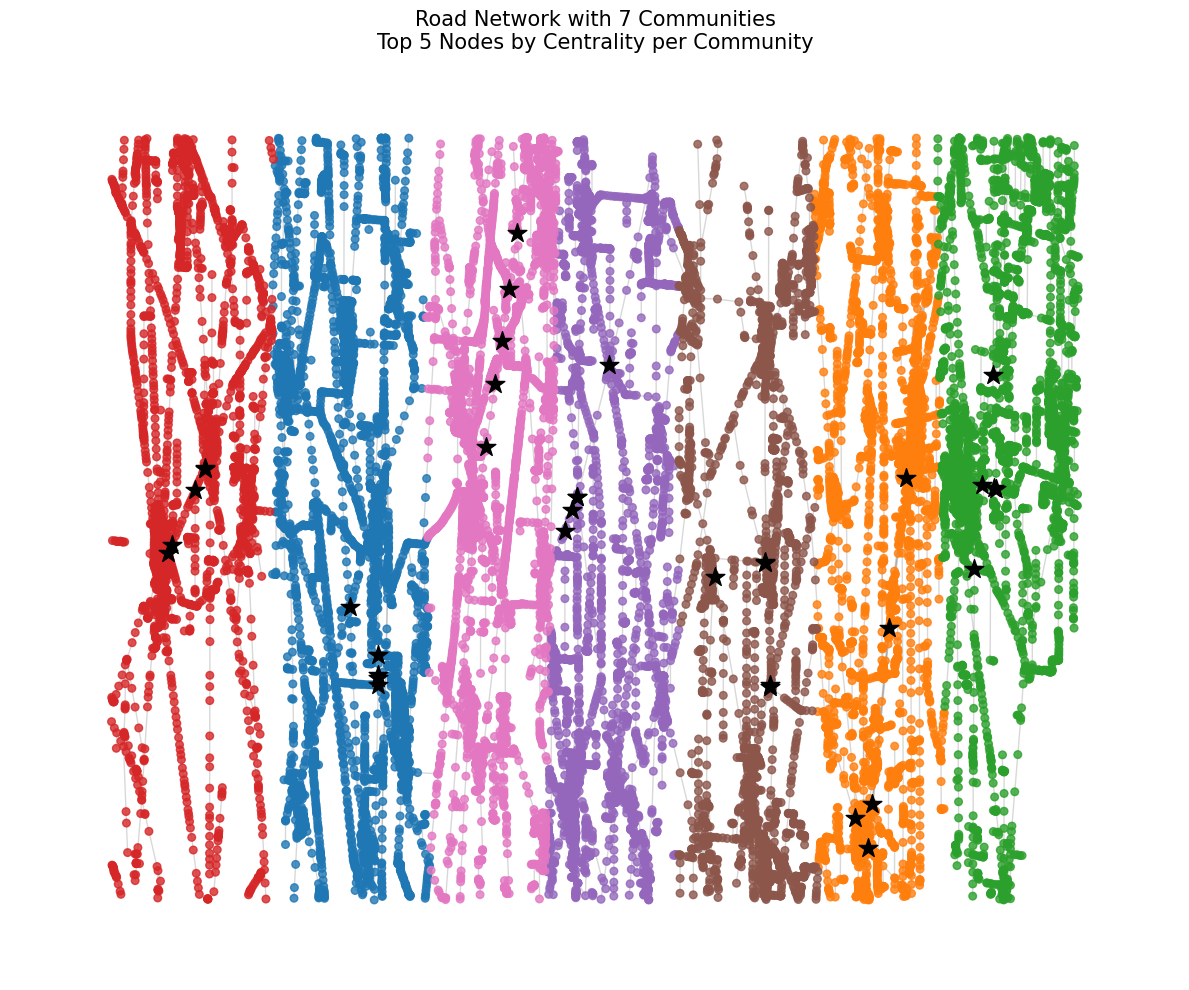

Saved 35 top nodes to top_centrality_nodes.geojson


In [4]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.cluster import KMeans

# Load GeoJSON and create graph
def geojson_to_graph(geojson_path):
    with open(geojson_path, 'r') as f:
        data = json.load(f)

    G = nx.Graph()
    node_map = {}
    node_id = 1

    for feature in data["features"]:
        coordinates = feature["geometry"]["coordinates"]
        local_nodes = []

        for lon, lat in coordinates:
            if (lat, lon) not in node_map:
                node_map[(lat, lon)] = node_id
                G.add_node(node_id, pos=(lon, lat), coords=(lon, lat))
                node_id += 1
            local_nodes.append(node_map[(lat, lon)])

        for i in range(len(local_nodes) - 1):
            G.add_edge(local_nodes[i], local_nodes[i + 1])

    return G, node_map

# Detect communities, calculate centrality, and plot
def analyze_and_plot_communities(G, num_communities=5):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # Create a matrix of node positions for K-Means
    positions = np.array([pos[node] for node in G.nodes()])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_communities, random_state=42)
    clusters = kmeans.fit_predict(positions)

    # Create a mapping of nodes to their community
    community_map = {}
    for i, node in enumerate(G.nodes()):
        community_map[node] = clusters[i]

    # Create communities list
    communities = [[] for _ in range(num_communities)]
    for node, community_id in community_map.items():
        communities[community_id].append(node)

    print(f"Number of communities: {num_communities}")

    # Calculate centrality measures for each community
    top_nodes_all = []

    for i, community in enumerate(communities):
        print(f"Community {i}: {len(community)} nodes")

        # Create subgraph for this community
        subgraph = G.subgraph(community)

        # Calculate centrality measures
        betweenness = nx.betweenness_centrality(subgraph)
        closeness = nx.closeness_centrality(subgraph)

        # Calculate average centrality
        avg_centrality = {}
        for node in subgraph.nodes():
            avg_centrality[node] = (betweenness.get(node, 0) + closeness.get(node, 0)) / 2

        # Get top 5 nodes (or fewer if community has less than 5 nodes)
        top_nodes = sorted(avg_centrality, key=avg_centrality.get, reverse=True)[:min(1, len(community))]
        top_nodes_all.extend(top_nodes)

        print(f"  Top nodes in community {i}: {top_nodes}")

    # Create colormap
    colors = list(mcolors.TABLEAU_COLORS.values())
    if num_communities > len(colors):
        colors = plt.cm.tab20.colors

    # Plot the graph
    plt.figure(figsize=(12, 10))

    # Plot edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

    # Plot nodes colored by community
    for i, community in enumerate(communities):
        color = colors[i % len(colors)]
        nx.draw_networkx_nodes(G, pos,
                              nodelist=list(community),
                              node_color=[color] * len(community),
                              node_size=30,
                              alpha=0.8)

    # Highlight top nodes
    nx.draw_networkx_nodes(G, pos,
                          nodelist=top_nodes_all,
                          node_color='black',
                          node_shape='*',
                          node_size=200,
                          alpha=1.0)

    plt.title(f"Road Network with {num_communities} Communities\nTop 5 Nodes by Centrality per Community", fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return top_nodes_all, community_map

# Save top nodes to GeoJSON
def save_top_nodes_to_geojson(G, top_nodes, output_path):
    coords = nx.get_node_attributes(G, 'coords')

    features = []
    for node in top_nodes:
        lon, lat = coords[node]
        feature = {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [lon, lat]
            },
            "properties": {
                "node_id": node
            }
        }
        features.append(feature)

    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    with open(output_path, 'w') as f:
        json.dump(geojson, f, indent=2)

    print(f"Saved {len(top_nodes)} top nodes to {output_path}")

# Main execution
graph, node_map = geojson_to_graph("filtered_output_2_small.geojson")
top_nodes, community_map = analyze_and_plot_communities(graph, num_communities=100)
save_top_nodes_to_geojson(graph, top_nodes, "top_centrality_nodes.geojson")

Number of communities: 100
Community 0: 215 nodes
  Top nodes in community 0: [8846]
Community 1: 165 nodes
  Top nodes in community 1: [13939]
Community 2: 312 nodes
  Top nodes in community 2: [11365]
Community 3: 209 nodes
  Top nodes in community 3: [3798]
Community 4: 293 nodes
  Top nodes in community 4: [24362]
Community 5: 326 nodes
  Top nodes in community 5: [1522]
Community 6: 308 nodes
  Top nodes in community 6: [8550]
Community 7: 249 nodes
  Top nodes in community 7: [16064]
Community 8: 235 nodes
  Top nodes in community 8: [5043]
Community 9: 319 nodes
  Top nodes in community 9: [6392]
Community 10: 125 nodes
  Top nodes in community 10: [5643]
Community 11: 537 nodes
  Top nodes in community 11: [4242]
Community 12: 647 nodes
  Top nodes in community 12: [12719]
Community 13: 765 nodes
  Top nodes in community 13: [17436]
Community 14: 266 nodes
  Top nodes in community 14: [184]
Community 15: 287 nodes
  Top nodes in community 15: [7476]
Community 16: 449 nodes
  To

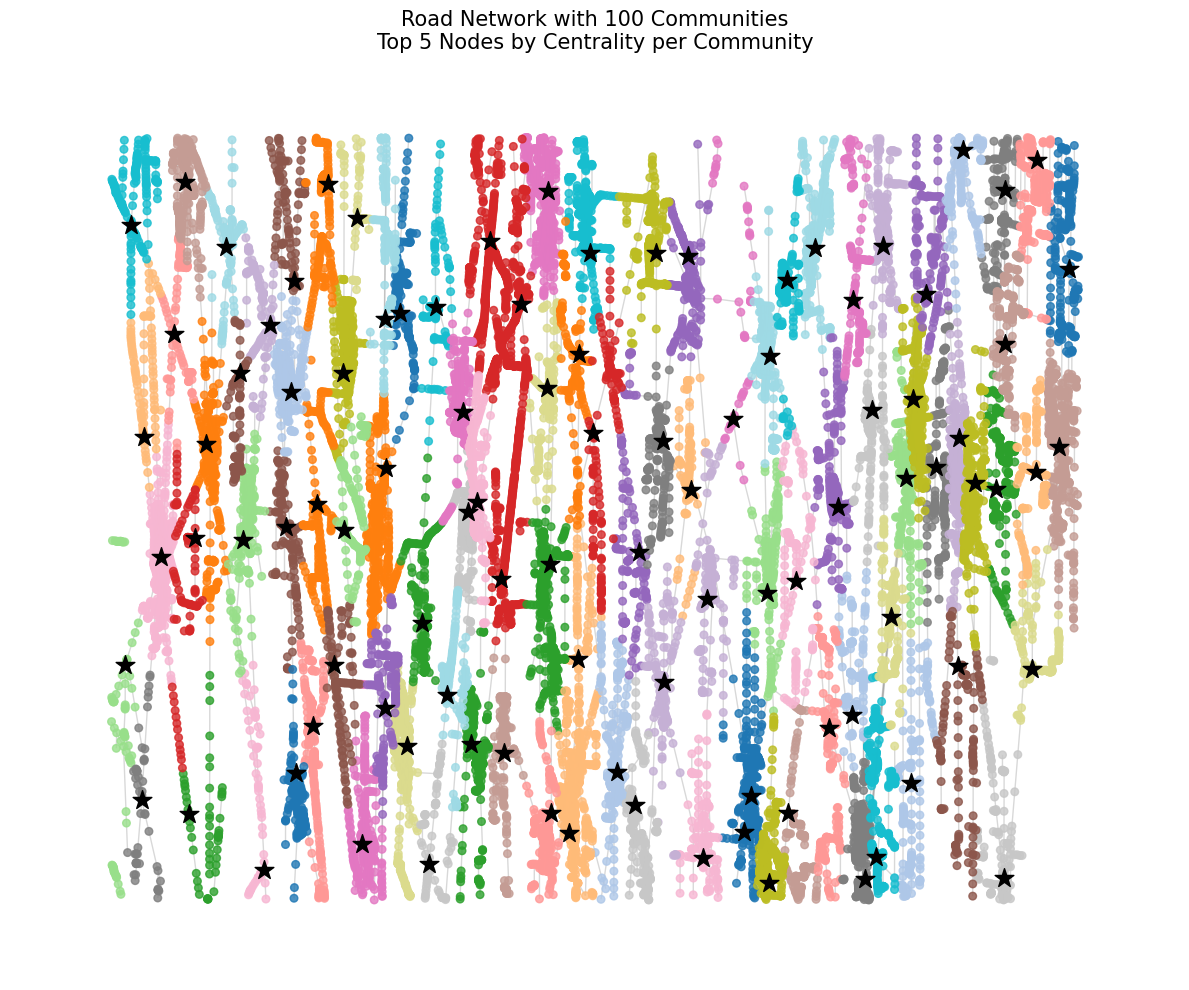

Saved 100 top nodes to top_centrality_nodes.geojson


In [5]:
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.cluster import KMeans

# Load GeoJSON and create graph
def geojson_to_graph(geojson_path):
    with open(geojson_path, 'r') as f:
        data = json.load(f)

    G = nx.Graph()
    node_map = {}
    node_id = 1

    for feature in data["features"]:
        coordinates = feature["geometry"]["coordinates"]
        local_nodes = []

        for lon, lat in coordinates:
            if (lat, lon) not in node_map:
                node_map[(lat, lon)] = node_id
                G.add_node(node_id, pos=(lon, lat), coords=(lon, lat))
                node_id += 1
            local_nodes.append(node_map[(lat, lon)])

        for i in range(len(local_nodes) - 1):
            G.add_edge(local_nodes[i], local_nodes[i + 1])

    return G, node_map

# Detect communities, calculate centrality, and plot
def analyze_and_plot_communities(G, num_communities=5):
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')

    # Create a matrix of node positions for K-Means
    positions = np.array([pos[node] for node in G.nodes()])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=num_communities, random_state=42)
    clusters = kmeans.fit_predict(positions)

    # Create a mapping of nodes to their community
    community_map = {}
    for i, node in enumerate(G.nodes()):
        community_map[node] = clusters[i]

    # Create communities list
    communities = [[] for _ in range(num_communities)]
    for node, community_id in community_map.items():
        communities[community_id].append(node)

    print(f"Number of communities: {num_communities}")

    # Calculate centrality measures for each community
    top_nodes_all = []

    for i, community in enumerate(communities):
        print(f"Community {i}: {len(community)} nodes")

        # Create subgraph for this community
        subgraph = G.subgraph(community)

        # Calculate centrality measures
        betweenness = nx.betweenness_centrality(subgraph)
        closeness = nx.closeness_centrality(subgraph)

        # Calculate average centrality
        avg_centrality = {}
        for node in subgraph.nodes():
            avg_centrality[node] = (betweenness.get(node, 0) + closeness.get(node, 0)) / 2

        # Get top 5 nodes (or fewer if community has less than 5 nodes)
        top_nodes = sorted(avg_centrality, key=avg_centrality.get, reverse=True)[:min(1, len(community))]
        top_nodes_all.extend(top_nodes)

        print(f"  Top nodes in community {i}: {top_nodes}")

    # Create colormap
    colors = list(mcolors.TABLEAU_COLORS.values())
    if num_communities > len(colors):
        colors = plt.cm.tab20.colors

    # Plot the graph
    plt.figure(figsize=(12, 10))

    # Plot edges
    nx.draw_networkx_edges(G, pos, alpha=0.3, edge_color='gray')

    # Plot nodes colored by community
    for i, community in enumerate(communities):
        color = colors[i % len(colors)]
        nx.draw_networkx_nodes(G, pos,
                              nodelist=list(community),
                              node_color=[color] * len(community),
                              node_size=30,
                              alpha=0.8)

    # Highlight top nodes
    nx.draw_networkx_nodes(G, pos,
                          nodelist=top_nodes_all,
                          node_color='black',
                          node_shape='*',
                          node_size=200,
                          alpha=1.0)

    plt.title(f"Road Network with {num_communities} Communities\nTop 5 Nodes by Centrality per Community", fontsize=15)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    return top_nodes_all, community_map

# Save top nodes to GeoJSON
def save_top_nodes_to_geojson(G, top_nodes, output_path):
    coords = nx.get_node_attributes(G, 'coords')

    features = []
    for node in top_nodes:
        lon, lat = coords[node]
        feature = {
            "type": "Feature",
            "geometry": {
                "type": "Point",
                "coordinates": [lon, lat]
            },
            "properties": {
                "node_id": node
            }
        }
        features.append(feature)

    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    with open(output_path, 'w') as f:
        json.dump(geojson, f, indent=2)

    print(f"Saved {len(top_nodes)} top nodes to {output_path}")

# Main execution
graph, node_map = geojson_to_graph("filtered_output_2_small.geojson")
top_nodes, community_map = analyze_and_plot_communities(graph, num_communities=100)
save_top_nodes_to_geojson(graph, top_nodes, "top_centrality_nodes.geojson")